Búsqueda exhaustiva, Monte Carlo y gradiente descendente
===

* 30:00 min | Última modificación: Mayo 21, 2021 | [YouTube]

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

## Definición del problema

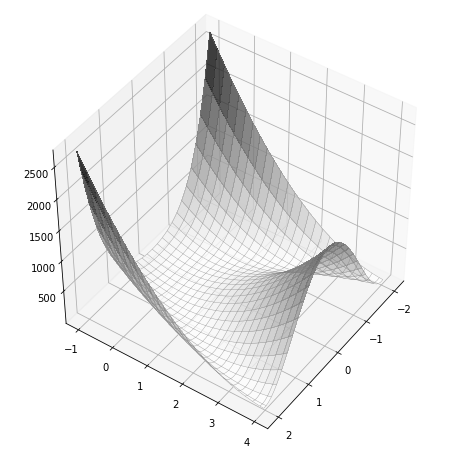

In [2]:
from plots import plot_contour, plot_surface
from testfunctions import rosenbrock as fn

#
# Se desea encontrar el punto de mínima de la función de
# Rosenbrock de dos dimensiones. El punto de mínima es
# f(1, 1) = 0. La región de busqueda es
#
#    -2.048 < x < 2.048
#       -1. < y < 4.
#
plot_surface(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
)

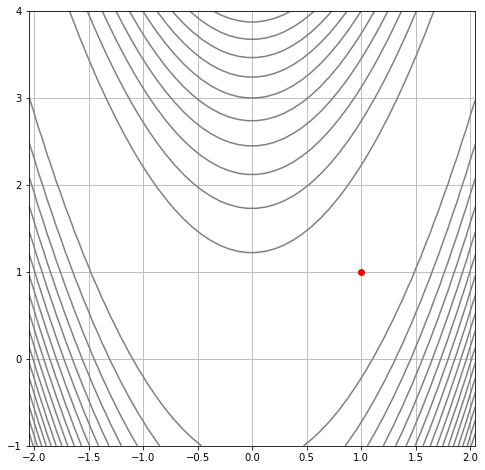

In [3]:
plot_contour(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
    minimum=[(1, 1)],
)

## Búsqueda exhaustiva

In [4]:
#
# Este método consiste en generar una malla de puntos.
# El punto de mínima corresponde al menor valor
# encontrado dentro de la malla.
#

# limites de la región de búsqueda
xb = (-2.048, 2.048)
yb = (-1.0, 4.0)

# número de puntos de la malla
n_points = 50


X = np.linspace(start=xb[0], stop=xb[1], num=n_points)
Y = np.linspace(start=yb[0], stop=yb[1], num=n_points)
X, Y = np.meshgrid(X, Y)
Z = np.array([(x, y, fn(np.array([x, y]))) for x, y in zip(X.ravel(), Y.ravel())])


# búsca el punto de mínima

from operator import itemgetter

Z = sorted(Z, key=itemgetter(2))

#  punto de mínima encontrado y cantidad de puntos evaluados
Z[0], len(Z)

(array([0.96130612, 0.93877551, 0.02300652]), 2500)

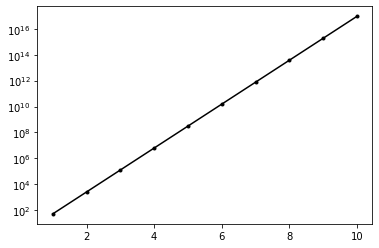

In [5]:
#
# Este método no es viable cuando aumenta la cantidad de
# dimensiones de la función a minimizar.
#
#    puntos_a_evaluar = n_points ** n_dims
#
# El crecimiento es exponencial.
#
n_points = 50
n_dims = np.array(range(1, 11))
fn_evals = np.power(n_points, n_dims)
plt.plot(n_dims, fn_evals, ".-k")
plt.yscale("log")
plt.show()

## Método de Monte Carlo

In [6]:
#
# Consiste en generar un muestreo aleatorio de la región
# factibles y escoger el mejor punto encontrado
#
n_points = 1000

X = np.random.uniform(low=xb[0], high=xb[1], size=n_points)
Y = np.random.uniform(low=yb[0], high=yb[1], size=n_points)
Z = np.array([(x, y, fn(np.array([x, y]))) for x, y in zip(X, Y)])
Z_sorted = sorted(Z, key=itemgetter(2))

#
#  punto de mínima encontrado y cantidad de puntos evaluados
#
Z_sorted[0], len(Z_sorted)

(array([1.10859582, 1.21495305, 0.03148179]), 1000)

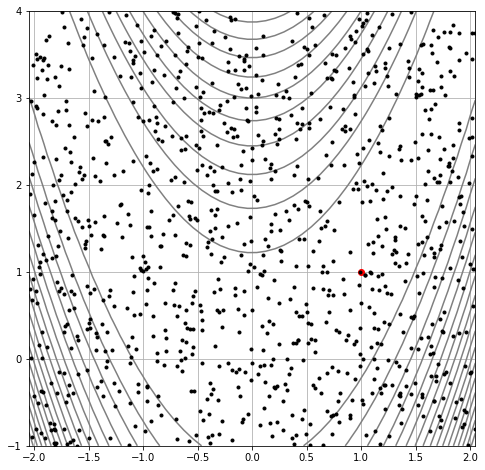

In [7]:
#
# Se grafican los puntos generados aleatoriamente sobre el
# contorno de la función.
#
plot_contour(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
    minimum=[(1, 1)],
)

plt.gca().plot(X, Y, ".k")

Para analizar el comportamiento resulta más interesante considerar la generación de 10 bloques de 100 elementos aleatorios cada uno.

In [8]:
from generators import RandomUniform

#
# Crea una función que genera soluciones uniformemente
# distribuidas en el hipercubo definido por los límites
# low y high
#
monte_carlo = RandomUniform(pop_size=100, low=[-2.048, -1.0], high=[2.048, 4.0])

#
# Genera una muestra aleatoria de 100 soluciones
#
solutions = monte_carlo()

#
# Primeros 5 vectores aleatorios
#
solutions[:5]

[{'x': array([2.00234477, 2.70014476]), 'fn_x': None},
 {'x': array([-1.67624568,  3.7638967 ]), 'fn_x': None},
 {'x': array([1.47587746, 2.64047329]), 'fn_x': None},
 {'x': array([-0.65671238, -0.60125541]), 'fn_x': None},
 {'x': array([0.96377444, 3.97108144]), 'fn_x': None}]

In [9]:
#
# Evaluación de la función objetivo
#
from fnevaluator import FnEvaluator

#
# Crea una instancia del evaluador que permite evaluar la
# función de rosenbrock para cada elemento de la muestra
# de soluciones
#
evaluator = FnEvaluator(fn)

#
# Evalua la muestra aleatoria
#
solutions = evaluator(solutions)

#
# Primeros 5 vectores aleatorios evaluados
#
solutions[:5]

[{'x': array([2.00234477, 2.70014476]), 'fn_x': 172.41558861738238},
 {'x': array([-1.67624568,  3.7638967 ]), 'fn_x': 98.19242293399303},
 {'x': array([1.47587746, 2.64047329]), 'fn_x': 21.594798099704782},
 {'x': array([-0.65671238, -0.60125541]), 'fn_x': 109.35580461454485},
 {'x': array([0.96377444, 3.97108144]), 'fn_x': 925.5117270830332}]

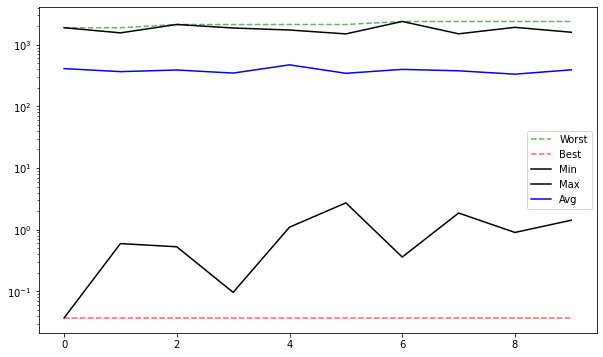

In [10]:
from stats import Statistics

#
# Se instancia un objeto para computar las estadísticas de
# la corrida
#
stats = Statistics()

#
# Se generan 10 poblaciones de 100 elementos cada una
#
for i_run in range(10):
    #
    # Generación de la población
    #
    solutions = monte_carlo()

    #
    # Se evalua la función objetivo
    #
    solutions = evaluator(solutions)

    #
    # Se computan las estadísticas de la población actual
    #
    stats(solutions)

#
# Evolución de las estadísitcas para cada corrida. El
# algoritmo no aprovecha la información obtenida sobre
# la superficie en cada una de las 10 iteraciones. El
# valor promedio de la función objetivo no mejora.
#
stats.plot()

In [11]:
#
# Valor mínimo encontrado en cada una de las 10 corridas
#
stats.min

[0.03691295879038481,
 0.5941923329960777,
 0.5274965631861956,
 0.09602579613898571,
 1.0971603487492656,
 2.7204400566238527,
 0.3593045128732077,
 1.8612783057941003,
 0.9004533752617557,
 1.4234081221807569]

In [12]:
#
# Mejor valor encontrado en cada una de las 10 corridas.
# Despues de la 3ra corrida no mejora
#
stats.best

[0.03691295879038481,
 0.03691295879038481,
 0.03691295879038481,
 0.03691295879038481,
 0.03691295879038481,
 0.03691295879038481,
 0.03691295879038481,
 0.03691295879038481,
 0.03691295879038481,
 0.03691295879038481]

## Método del Gradiente

In [13]:
#
# El método del gradiente descendente aprovecha la
# información local que entrega el punto actual para
# generar una aproximación mejor al mínimo.
#
from gd import GradientDescendent

#
# Se crea una instancia del optimizador. Cada llamada
# realiza una sola iteración del método del gradiente
# descendente.
#
optimizer = GradientDescendent(fn=fn, learning_rate=0.0001)

#
# Se crea una instancia del geneador para crear poblaciones
# de una sola solución.
#
monte_carlo = RandomUniform(
    pop_size=1,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)

#
# Se crea la población de soluciones
#
solutions = monte_carlo()


#
# Se instancia un objeto para computar las estadísticas de
#  la corrida
#
stats = Statistics()

#
# Se realizan NITER iteraciones del algoritmo de gradiente
# descendente
#
NITER = 50

for iter in range(NITER):
    #
    # El único individuo existente tiene indice 0
    #
    solutions = optimizer(solutions)

    #
    # Se computan las estadísticas de la población actual
    #
    stats(solutions)

solutions[0].x, solutions[0].fn_x

(array([-1.39411328,  1.95912742]), 5.756038251057739)

In [14]:
#
# Valor mínimo encontrado en cada iteración
#
stats.min

[920.7295506426381,
 879.917993998467,
 839.8529109696777,
 800.3710904501464,
 761.3064420052051,
 722.493337086676,
 683.7714940715882,
 644.9926883011417,
 606.0294893156171,
 566.7860582338607,
 527.2107486833628,
 487.30982488281825,
 447.1610476528308,
 406.92524040958995,
 366.8533616207922,
 327.2862867096162,
 288.64470417211646,
 251.40749802273334,
 216.07881073482852,
 183.14645448334494,
 153.03689640252364,
 126.07384640769565,
 102.4477063721081,
 82.2014050795217,
 65.23477350214851,
 51.32562578481733,
 40.16239590968201,
 31.381529207433864,
 24.60311947265716,
 19.460061721296057,
 15.6183993027648,
 12.788754170649979,
 10.730237822071723,
 9.248931595866221,
 8.193056889590657,
 7.446595019086216,
 6.922609463818036,
 6.557036593391473,
 6.303326227397339,
 6.128049951976352,
 6.007438119938575,
 5.924728346491234,
 5.868181588044938,
 5.829624656896706,
 5.803395106030667,
 5.785586428928978,
 5.773513294118983,
 5.765335655643624,
 5.759796249041159,
 5.756038251

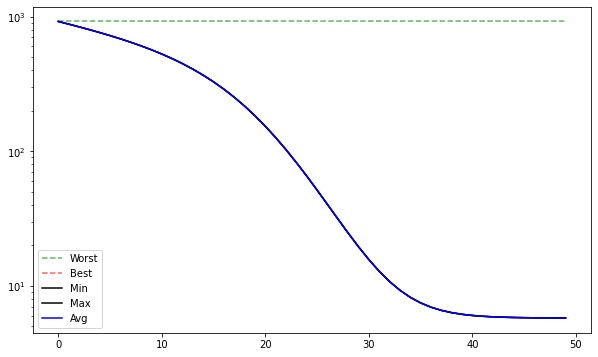

In [15]:
stats.plot()

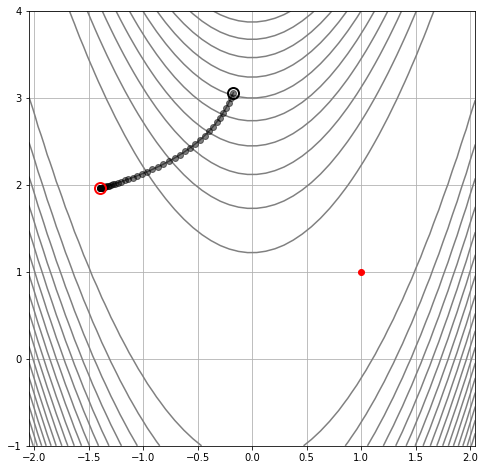

In [16]:
#
# Trayectoria del punto inicial al punto final
#
x = [point[0] for point in stats.x]
y = [point[1] for point in stats.x]

plot_contour(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
    minimum=[(1, 1)],
)

plt.gca().plot(
    x,
    y,
    "o-k",
    alpha=0.5,
)

plt.gca().plot(
    x[0],
    y[0],
    "o",
    c="black",
    fillstyle="none",
    markersize=11,
    markeredgewidth=2,
)

plt.gca().plot(
    x[-1],
    y[-1],
    "o",
    c="red",
    fillstyle="none",
    markersize=11,
    markeredgewidth=2,
)

plt.show()

## Método del gradiente descendente con reinicio

In [17]:
#
# El resultado del método es dependiente del punto de
# arranque por lo que se suele reiniciar la optimización
# usando puntos de arranque aleatorios
#

# Crea una instancia del optimizador
optimizer = GradientDescendent(fn=fn, learning_rate=0.0001)

# Estadísticas de las corridas
stats = Statistics()

# Generador del punto aleatorio
monte_carlo = RandomUniform(
    pop_size=1,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)

# Número de reinicios
NRESTARTS = 10


# Número de iteraciones para cada reinicio
NITER = 50

for cycle in range(NRESTARTS):

    #  reinicio
    solutions = monte_carlo()

    for iter in range(NITER):

        # El único individuo existente tiene indice 0
        solutions = optimizer(solutions)

        # Se computan las estadísticas de la población actual
        stats(solutions)


stats.x_opt, stats.fn_opt

(array([-0.09122663,  3.6670279 ]), 1339.8034439417352)

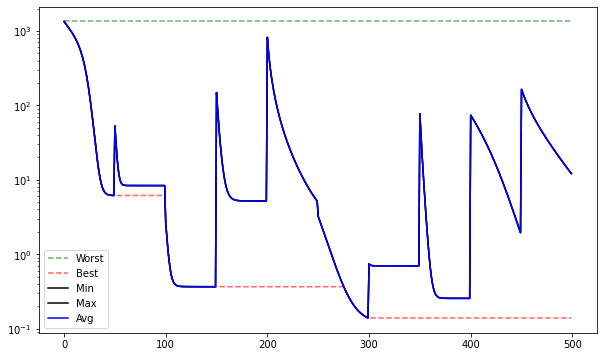

In [18]:
stats.plot()

## Búsqueda de un buen punto de inicio

In [19]:
#
# En superficies dificiles, malos puntos de inicio suelen
# llevar a malas soluciones finales, por lo que se puede
# usar una técnica como Monte Carlo para encontrar un buen
# punto de arranque
#

# Crea una instancia del optimizador
optimizer = GradientDescendent(fn=fn, learning_rate=0.0001)

# Estadísticas de las corridas
stats = Statistics()

# Cantidad de soluciones simultánteas
POPSIZE = 10

# Generador del punto aleatorio
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)

# Número de iteraciones
NITER = 50

# Genera una población inicial de soluciones
solutions = optimizer(solutions)
stats(solutions)

#
# Crea una instancia del seleccionador
#
from selection import BestK

best_k = BestK(K=1)
solutions = best_k(solutions)

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.x_opt, stats.fn_opt

(array([ 0.15202088, -0.3073373 ]), 11.638633566238473)

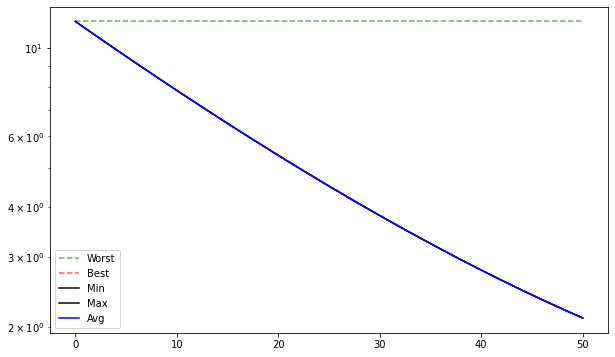

In [20]:
stats.plot()

## Genetización del método del gradiente descendente

In [21]:
#
# Se refiere al hecho de tener una población de soluciones
# y en cada ciclo, cada una realiza un ciclo del gradiente
#  descendente (o cualquier otra técnica de búsqueda local)
#

# Crea una instancia del optimizador
optimizer = GradientDescendent(fn=fn, learning_rate=0.0001)

# Estadísticas de las corridas
stats = Statistics()

# Cantidad de soluciones simultánteas
POPSIZE = 10

# Generador del punto aleatorio
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)

# Número de iteraciones
NITER = 50

#  Generación de las soluciones iniciales
solutions = monte_carlo()

for iter in range(NITER):

    solutions = optimizer(solutions)
    stats(solutions)


stats.x_opt, stats.fn_opt

(array([-1.65669621,  3.56747636]), 74.76362015928713)

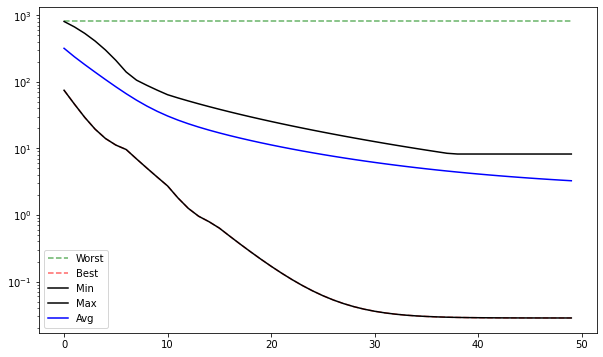

In [22]:
stats.plot()

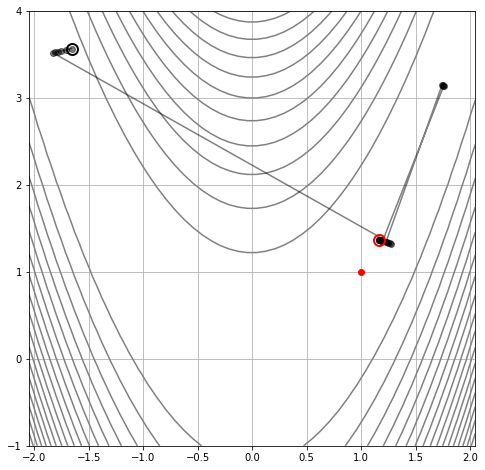

In [23]:
#
# Trayectoria del punto inicial al punto final
#
x = [point[0] for point in stats.x]
y = [point[1] for point in stats.x]

plot_contour(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
    minimum=[(1, 1)],
)

plt.gca().plot(
    x,
    y,
    "o-k",
    alpha=0.5,
)

plt.gca().plot(
    x[0],
    y[0],
    "o",
    c="black",
    fillstyle="none",
    markersize=11,
    markeredgewidth=2,
)

plt.gca().plot(
    x[-1],
    y[-1],
    "o",
    c="red",
    fillstyle="none",
    markersize=11,
    markeredgewidth=2,
)

plt.show()